## Outline

* Downloading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* Simple visualisation
* Exercises

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

import torchvision.models as models

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn

In [3]:
device=torch.device('cuda')
print(device)

cuda


## Data loading

In [4]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

In [5]:
#evalset = torchvision.datasets.ImageFolder(root='./data/imagenet', transform=transform)
#evalloader = torch.utils.data.DataLoader(evalset, batch_size=batch_size, shuffle=True)

In [6]:
trainset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [7]:
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

In [8]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [9]:
trainloader

In [10]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape) # [4, 1, 28, 28] -> 4 no. of images,1 channel, height,width

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
5


## Visualise data

In [11]:

img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [12]:


npimg = img.numpy()
print(npimg.shape) # (1,28,28) -> (channel,height,width)

(1, 28, 28)


In [13]:


npimg = np.transpose(npimg, (1, 2, 0)) # (1,28,28) or (k,n,m) => (28,28,1) or (n,m,k)
print(npimg.shape)
npimg=npimg[:,:,0]
print(npimg.shape)

(28, 28, 1)
(28, 28)


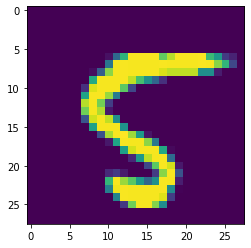

In [14]:
plt.figure()
plt.imshow(npimg)
plt.show()

In [15]:
def imshow(img,imagetitle):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(imagetitle)
    plt.show()

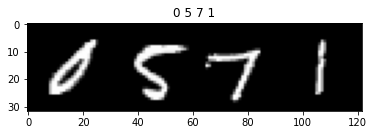

In [16]:
imshow(torchvision.utils.make_grid(images),imagetitle=' '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer

In [17]:
class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3,
                            padding=(1,1),
                            stride=(1,1)) # padding=(1,1), stride=(1,1))
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [18]:
net = FirstCNN()

In [19]:
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

In [20]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 1, 3, 3])
torch.Size([16])


In [21]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(28, 28)


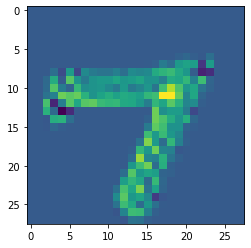

In [38]:
plt.imshow(out[2, 0, :, :].detach().numpy())
plt.show()

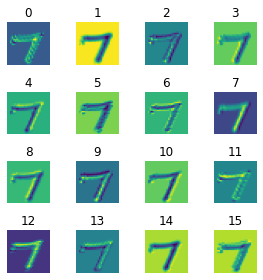

In [37]:
fig = plt.figure(figsize=(4,4))
for i in range(16):
        ax1 = fig.add_subplot(4,4,i+1)                
        ax1.imshow(out[2, i, :, :].detach().numpy())
        ax1.axis('off')
        ax1.set_title(str(i))
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
plt.tight_layout()
plt.show()        

## LeNet

In [39]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, 3),         # (N, 1, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 3),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [40]:
net = LeNet()
out = net(images)

torch.Size([4, 1, 28, 28])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [41]:
print(out)

tensor([[ 0.0010, -0.0324,  0.0121, -0.0630, -0.0660,  0.0398, -0.1600,  0.0337,
         -0.0020, -0.0468],
        [ 0.0040, -0.0421,  0.0292, -0.0529, -0.0592,  0.0664, -0.1470,  0.0401,
          0.0034, -0.0422],
        [-0.0018, -0.0457,  0.0010, -0.0482, -0.0679,  0.0335, -0.1306,  0.0320,
         -0.0041, -0.0486],
        [ 0.0041, -0.0338,  0.0182, -0.0470, -0.0695,  0.0479, -0.1348,  0.0374,
          0.0089, -0.0506]], grad_fn=<AddmmBackward>)


In [42]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([5, 5, 5, 5])


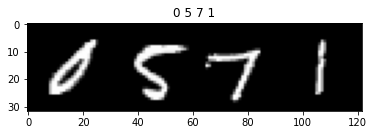

In [43]:
imshow(torchvision.utils.make_grid(images),' '.join(classes[labels[j]] for j in range(4)))

## Training LeNet

In [44]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [45]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, 3),         # (N, 1, 32, 32) -> (N,  6, 28, 28)
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 3),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.ReLU(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.ReLU(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [47]:
batch_size = 128
#trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
#testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [48]:
def plot_confusion(confusion_matrix,exp_id='train'):
    classes = np.arange(10)
    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(confusion_matrix.shape[1]),
               yticks=np.arange(confusion_matrix.shape[0]),
               xticklabels=classes, yticklabels=classes,
               ylabel='True label',
               xlabel='Predicted label',
               title='Confusion Matrix of %s' % exp_id)
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(j, i, int(confusion_matrix[i, j]),
                    ha="center", va="center",
                    color="white" if confusion_matrix[i, j] > thresh else "black")

    fig.tight_layout()

    image_path = 'confusion_%s.png' % (exp_id)
    plt.savefig(image_path)

In [75]:
def evaluation(dataloader, model,exp_id='train'):
    total, correct = 0, 0
    confusion_matrix = np.zeros([10, 10])
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
        for x, y in zip(pred.cpu().numpy(), labels.cpu().numpy()):
                confusion_matrix[x][y] += 1
    plot_confusion(confusion_matrix,exp_id)
    return 100 * correct / total

In [76]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(),lr=0.001,)

In [77]:
%%time
max_epochs = 2

n_iters = np.ceil(len(trainset)/batch_size)
for epoch in range(max_epochs):

    print('Epoch: %d/%d' % (epoch, max_epochs))
    for i, data in enumerate(trainloader, 0):        
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))        

Epoch: 0/2
Iteration: 0/469, Loss: 2.30
Iteration: 100/469, Loss: 0.55
Iteration: 200/469, Loss: 0.42
Iteration: 300/469, Loss: 0.33
Iteration: 400/469, Loss: 0.21
Epoch: 1/2
Iteration: 0/469, Loss: 0.11
Iteration: 100/469, Loss: 0.13
Iteration: 200/469, Loss: 0.17
Iteration: 300/469, Loss: 0.15
Iteration: 400/469, Loss: 0.10
Wall time: 12.1 s


Train acc: 96.80 , Test acc: 96.81


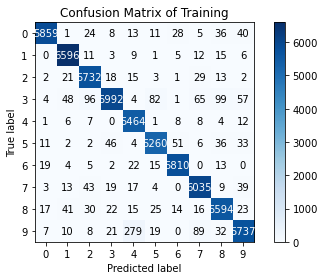

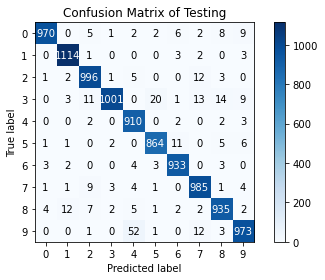

In [78]:
print('Train acc: %0.2f , Test acc: %0.2f' % (evaluation(trainloader,net,'Training'),evaluation(testloader,net,'Testing')))

# resnet18

In [273]:
batch_size = 128
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [274]:
#vgg = models.vgg16_bn(pretrained=True)
resnet18 = models.resnet18()

In [275]:
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [276]:
resnet18.conv1=nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

resnet18.fc=nn.Linear(in_features=512, out_features=10, bias=True)

In [277]:
resnet18

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [278]:
resnet18 = resnet18.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(resnet18.parameters(),lr=0.01,)

Epoch: 0/1
Iteration: 0/469, Loss: 2.49
Iteration: 100/469, Loss: 0.06
Iteration: 200/469, Loss: 0.16
Iteration: 300/469, Loss: 0.05
Iteration: 400/469, Loss: 0.04


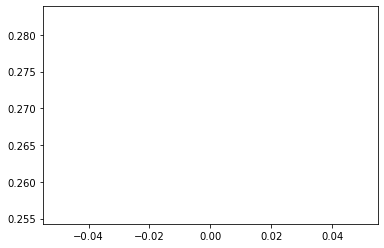

Wall time: 26.3 s


In [279]:
%%time

loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil(len(trainset)/batch_size)
for epoch in range(max_epochs):

    print('Epoch: %d/%d' % (epoch, max_epochs))
    for i, data in enumerate(trainloader, 0):        
        resnet18.train
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = resnet18(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))        

    loss_epoch_arr.append(loss.item())
plt.plot(loss_epoch_arr)
plt.show()

Train acc: 97.79 , Test acc: 98.02


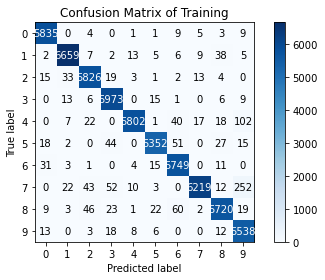

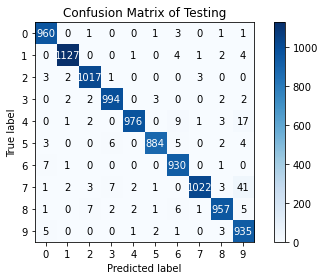

In [280]:
print('Train acc: %0.2f , Test acc: %0.2f' % (evaluation(trainloader,resnet18,'Training'),evaluation(testloader,resnet18,'Testing')))

## Basic Visualisation

In [289]:
resnet18=resnet18.to('cpu')

In [297]:
visualize_loader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [298]:
dataiter = iter(visualize_loader)
images, labels = dataiter.next()

In [299]:
print(images.shape) # [4, 1, 28, 28] -> 4 no. of images,1 channel, height,width

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
4


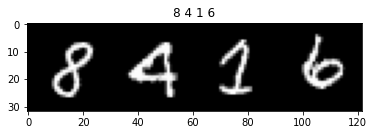

In [300]:
imshow(torchvision.utils.make_grid(images.cpu()),imagetitle=' '.join(classes[labels[j]] for j in range(4)))

In [301]:
def imshow2(img, title):
    npimg = img.numpy()
    
    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [302]:
def show_batch_images(images,model):
    
    outputs = model(images)
    _, pred = torch.max(outputs.data, 1)
        
    img = torchvision.utils.make_grid(images)
    imshow2(img, title=[classes[x.item()] for x in pred])
    
    return images, pred

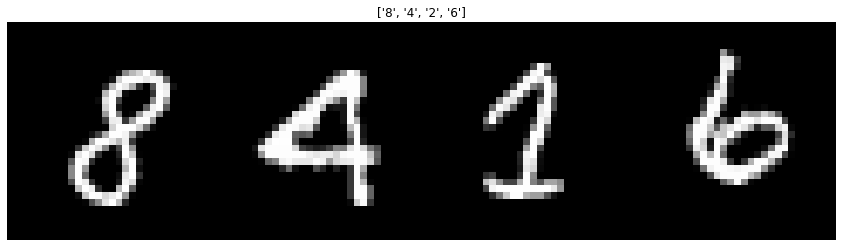

In [303]:
images, pred = show_batch_images(images,resnet18)

## Plotting Layer Weigts

In [304]:
import seaborn as sns

In [305]:
def plot_filters_single_channel(t):
    
    nplots = t.shape[0]*t.shape[1]
    ncols = 12
    nrows = 1 + nplots//ncols
    
    npimg = np.array(t.cpu().numpy(), np.float32)
    
    count = 0
    
    fig = plt.figure(figsize=(ncols, nrows))
    for i in range(t.shape[0]):
        for j in range(t.shape[1]):
            count += 1
            ax1 = fig.add_subplot(nrows, ncols, count)
            npimg = np.array(t[i, j].cpu().numpy(), np.float32)
            npimg = (npimg - np.mean(npimg)) / np.std(npimg)
            npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
            ax1.imshow(npimg)
            ax1.set_title(str(i) + ',' + str(j))
            ax1.axis('off')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
   
    plt.tight_layout()
    plt.show()

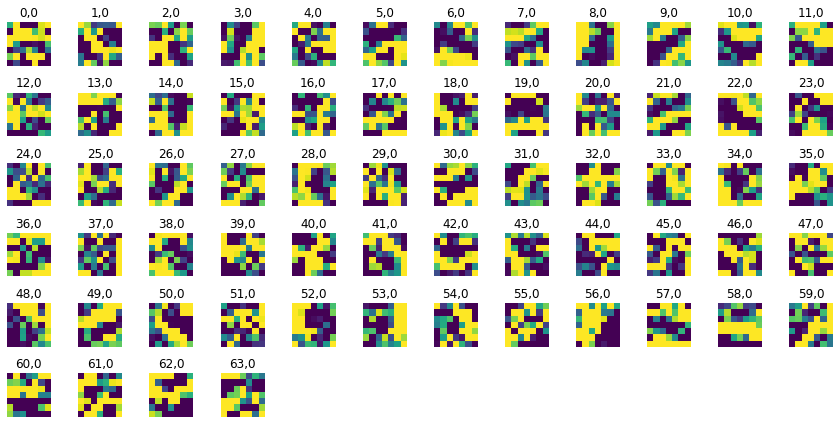

In [306]:
weight_tensor = resnet18.conv1.weight.data
plot_filters_single_channel(weight_tensor)